# ccdproc-05:   Master FLAT

## Overview
1. Build a list of FLAT image files
2. Select by filter
3. Display and statistics
4. Combine to obtain master FLAT for each filter

<pre>
Máster en Astrofísica UCM  -- Técnicas Experimentales en Astrofísica  
Jaime Zamorano and Nicolás Cardiel

This notebook has reproduced parts of the the astropy ccdproc docs: 
https://ccdproc.readthedocs.io/en/latest/reduction_toolbox.html#subtract-bias-and-dark

Version 1.0 2021/01/15  
</pre>

Note that the ``astropy`` package should be installed. In this sense, have a look to the
astropy installation description: https://docs.astropy.org/en/stable/install.html.

In [1]:
from pathlib import Path
import datetime

import matplotlib.pyplot as plt
#import matplotlib.mlab as ml
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

from astropy.io import fits
from astropy import units as u
from astropy.nddata import CCDData
import ccdproc

In [2]:
plt.style.use('./tea.mplstyle')

### Working with images in a directory
We will use the files of the first night of observations at NOT (Nordic Optical Telescope) 2008 that can be downloaded from   ftp://astrax.fis.ucm.es/pub/users/jaz/NOT_2008_04_12-14/N1/
or 
http://guaix.fis.ucm.es/~jaz/master_TEA/observaciones_NOT_2008/N1/

``directory`` should point to the working directory.  


In [3]:
dirname = 'N1'   # change to the path of your own working directory
directory = Path(dirname)

Let\'s create a list containing all the FITS files in that directory.  
We asume that the images were already trimmed and their names begin with 'zt_' (see previous notebook 'ccdproc_02' 'ccdproc_03' 'ccdproc_04')

In [4]:
filelist = list(sorted(directory.glob('zt_*.fits')))
print(filelist[10:15])    # printing only from 10 to 20

[PosixPath('N1/zt_ALrd120011.fits'), PosixPath('N1/zt_ALrd120012.fits'), PosixPath('N1/zt_ALrd120013.fits'), PosixPath('N1/zt_ALrd120014.fits'), PosixPath('N1/zt_ALrd120015.fits')]


### Selecting FLATS files 

See previous notebook ccdproc_01_ImageCollection

In [5]:
from ccdproc import ImageFileCollection
from ccdproc.utils.sample_directory import sample_directory_with_files

In [6]:
keys = ['imagetyp','OBJECT' , 'EXPTIME' , 'ALFLTID' , 'FAFLTID' , 'FBFLTID']
ic1 = ImageFileCollection(directory, keywords=keys, glob_include='zt_*.fits') # only keep track of keys
ic1.summary.colnames

['file', 'imagetyp', 'OBJECT', 'EXPTIME', 'ALFLTID', 'FAFLTID', 'FBFLTID']

In [7]:
print(keys)

['imagetyp', 'OBJECT', 'EXPTIME', 'ALFLTID', 'FAFLTID', 'FBFLTID']


In [8]:
list_of_flats = ic1.files_filtered(regex_match=True, object='flat')
print(list_of_flats)

['zt_ALrd120011.fits' 'zt_ALrd120012.fits' 'zt_ALrd120013.fits'
 'zt_ALrd120014.fits' 'zt_ALrd120015.fits' 'zt_ALrd120016.fits'
 'zt_ALrd120017.fits' 'zt_ALrd120018.fits' 'zt_ALrd120019.fits'
 'zt_ALrd120020.fits' 'zt_ALrd120021.fits' 'zt_ALrd120022.fits'
 'zt_ALrd120023.fits' 'zt_ALrd120024.fits' 'zt_ALrd120025.fits'
 'zt_ALrd120026.fits' 'zt_ALrd120027.fits' 'zt_ALrd120028.fits'
 'zt_ALrd120029.fits' 'zt_ALrd120030.fits' 'zt_ALrd120031.fits'
 'zt_ALrd120032.fits' 'zt_ALrd120033.fits' 'zt_ALrd120034.fits'
 'zt_ALrd120035.fits' 'zt_ALrd120036.fits' 'zt_ALrd120037.fits'
 'zt_ALrd120038.fits' 'zt_ALrd120039.fits' 'zt_ALrd120040.fits'
 'zt_ALrd120041.fits' 'zt_ALrd120042.fits' 'zt_ALrd120043.fits'
 'zt_ALrd120044.fits' 'zt_ALrd120045.fits' 'zt_ALrd120046.fits'
 'zt_ALrd120047.fits' 'zt_ALrd120048.fits' 'zt_ALrd120049.fits'
 'zt_ALrd120050.fits' 'zt_ALrd120051.fits' 'zt_ALrd120052.fits'
 'zt_ALrd120053.fits' 'zt_ALrd120054.fits' 'zt_ALrd120055.fits'
 'zt_ALrd120056.fits' 'zt_ALrd120057.fit

In [9]:
for fname in list_of_flats:
    with fits.open(directory / fname) as HDUList_object:
        primary_header = HDUList_object[0].header
        print(primary_header['FILENAME'],primary_header['OBJECT'],primary_header['exptime']
              ,primary_header['ALFLTID'],primary_header['FBFLTID'])

zt_ALrd120011.fits Dome Flat R 1.0 76 0
zt_ALrd120012.fits Dome Flat R 1.0 76 0
zt_ALrd120013.fits Dome Flat R 1.0 76 0
zt_ALrd120014.fits Dome Flat R 1.0 76 0
zt_ALrd120015.fits Dome Flat R 1.0 76 0
zt_ALrd120016.fits Dome Flat R 1.0 76 0
zt_ALrd120017.fits Dome Flat R 1.0 76 0
zt_ALrd120018.fits Dome Flat R 1.0 76 0
zt_ALrd120019.fits Dome Flat R 1.0 76 0
zt_ALrd120020.fits Dome Flat R 1.0 76 0
zt_ALrd120021.fits Dome Flat NB#78 10.0 0 78
zt_ALrd120022.fits Dome Flat NB#49 30.0 0 49
zt_ALrd120023.fits Dome Flat NB#78 30.0 0 78
zt_ALrd120024.fits Dome Flat NB#78 30.0 0 78
zt_ALrd120025.fits Dome Flat NB#78 30.0 0 78
zt_ALrd120026.fits Dome Flat NB#78 30.0 0 78
zt_ALrd120027.fits Dome Flat NB#78 30.0 0 78
zt_ALrd120028.fits Dome Flat NB#78 30.0 0 78
zt_ALrd120029.fits Dome Flat NB#78 30.0 0 78
zt_ALrd120030.fits Dome Flat NB#78 30.0 0 78
zt_ALrd120031.fits Dome Flat NB#78 30.0 0 78
zt_ALrd120032.fits Dome Flat NB#78 30.0 0 78
zt_ALrd120033.fits Dome Flat NB#49 20.0 0 49
zt_ALrd120034.f

The broad band filters are located in 'ALFLTID' while the narrow band are in the FASU B 'FBFLTID'

### Statistics and display

#### Reading the files

In [10]:
image_flats = []
for file in list_of_flats:
    image_flats.append(CCDData.read(directory / file)) #, unit="adu"))

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set OBSGEO-B to    28.757278 from OBSGEO-[XYZ].
Set OBSGEO-H to     2378.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    28.757278 from OBSGEO-[XYZ].
Set OBSGEO-H to     2378.994 from OBSGEO-[XYZ]'.


#### Analysing the images data

In [11]:
print('Filename          Object        exp Mean std min  max')
exposure = []
for img in image_flats:
    print(img.header['FILENAME'], 
          img.header['OBJECT'], 
          img.header['EXPTIME'], 
          int(np.mean(img)), 
          int(np.std(img)), 
          np.min(img), 
          np.max(img))

Filename          Object        exp Mean std min  max
zt_ALrd120011.fits Dome Flat R 1.0 27142 1428 30.5 31854.0
zt_ALrd120012.fits Dome Flat R 1.0 27100 1427 49.5 31773.0
zt_ALrd120013.fits Dome Flat R 1.0 27155 1429 32.5 31698.0
zt_ALrd120014.fits Dome Flat R 1.0 27223 1433 34.5 31742.5
zt_ALrd120015.fits Dome Flat R 1.0 27123 1428 38.5 42562.0
zt_ALrd120016.fits Dome Flat R 1.0 27045 1423 33.5 31798.0
zt_ALrd120017.fits Dome Flat R 1.0 27142 1429 34.5 31516.5
zt_ALrd120018.fits Dome Flat R 1.0 27298 1437 33.5 31987.0
zt_ALrd120019.fits Dome Flat R 1.0 27311 1437 29.5 37468.5
zt_ALrd120020.fits Dome Flat R 1.0 27486 1447 48.5 39239.5
zt_ALrd120021.fits Dome Flat NB#78 10.0 6753 2509 -8.5 16666.0
zt_ALrd120022.fits Dome Flat NB#49 30.0 27904 13348 28.5 45106.5
zt_ALrd120023.fits Dome Flat NB#78 30.0 20303 7538 11.5 29560.5
zt_ALrd120024.fits Dome Flat NB#78 30.0 20363 7560 11.5 29627.0
zt_ALrd120025.fits Dome Flat NB#78 30.0 20356 7557 21.5 29766.0
zt_ALrd120026.fits Dome Flat NB#78 3

#### Building list of flats files for each filter

With the information in the logbook and after inspecting the files we can prepare lists os FLATS for each filter.

In [12]:
FF_list_78 = ['120044' , '120045' , '120046' , '120047'
            , '120048' , '120049' , '120050']
FF_list_49 = ['120051' , '120052' , '120053' 
            , '120054' , '120055' , '120056']
FF_list_76 = ['120057' , '120058' , '120059' 
            , '120060' , '120061' , '120062']

#### Display of files

In [13]:
image_flats_78 = []
for idx in FF_list_78:
    fname = f'zt_ALrd{idx}.fits'
    image_flats_78.append(CCDData.read(directory / fname))
    
image_flats_49 = []
for idx in FF_list_49:
    fname = f'zt_ALrd{idx}.fits'
    image_flats_49.append(CCDData.read(directory / fname)) 
image_flats_76 = []
for idx in FF_list_76:
    fname = f'zt_ALrd{idx}.fits'
    image_flats_76.append(CCDData.read(directory / fname)) 

In [14]:
# auxiliary function to display a rectangle and compute mean value within it
def draw_rectangle(ax, image_data, x1, x2, y1, y2, color, text=False):
    ax.plot((x1, x1), (y1, y2), color, lw=1)
    ax.plot((x2, x2), (y1, y2), color, lw=1)
    ax.plot((x1, x2), (y1, y1), color, lw=1)
    ax.plot((x1, x2), (y2, y2), color, lw=1)
    if text:
        media = image_data[y1:y2,x1:x2].mean()
        std   = image_data[y1:y2,x1:x2].std()
        ax.text((x1+x2)/2, y1+(y2-y1)/8, str(int(media)), 
                ha='center', va='center', color=color, fontsize=12)        
        ax.text((x1+x2)/2, y2-(y2-y1)/8, str(round(std,1)), 
                ha='center', va='top', color=color, fontsize=12)
    return media, std

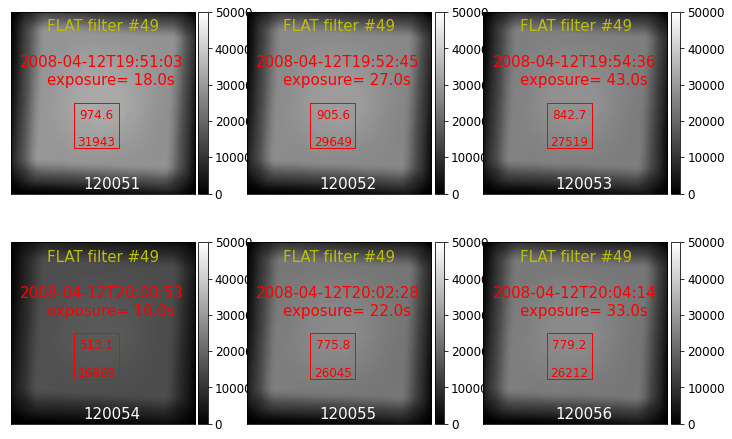

In [15]:
vmin,vmax = 0,50000
i = 0
fig = plt.figure(figsize=(12, 12))
for i in range(len(FF_list_49)):
        ax = plt.subplot(3,3,i+1)
        img = ax.imshow(image_flats_49[i], vmin=vmin,vmax=vmax)
        #ax.set_xlabel('X axis')
        #ax.set_ylabel('Y axis')
        ax.set_xticks([])
        ax.set_yticks([])
        draw_rectangle(ax, image_flats_49[i].data, 700, 1200, 500, 1000, color='r',text=True)
        ax.text(800, 50, image_flats_49[i].header['FILENAME'][7:-5], fontsize=15, color='w')
        ax.text(400,1800,'FLAT filter #49', fontsize=15, color='y')
        ax.text(100, 1400, image_flats_49[i].header['DATE-OBS'], fontsize=15, color='r')
        ax.text(400, 1200, 'exposure= '+ str(image_flats_49[i].header['exptime']) +'s', fontsize=15, color='r')
        
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img, cax=cax) #, label='Number of counts')
        ax.grid()
        i = i + 1

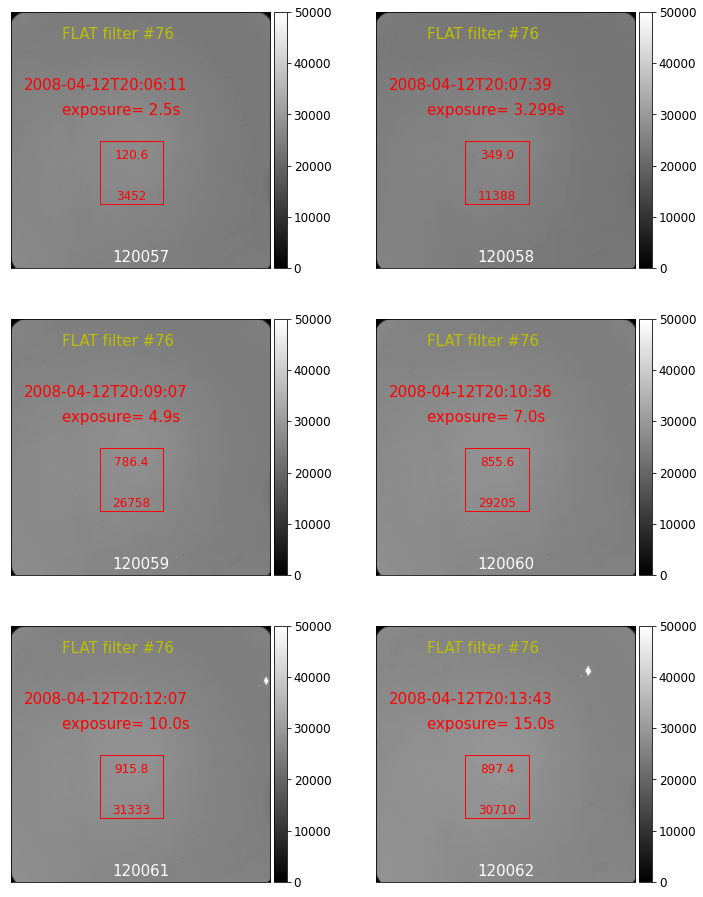

In [16]:
vmin,vmax = 0,50000
i = 0
fig = plt.figure(figsize=(12, 16))
for i in range(len(FF_list_76)):
        ax = plt.subplot(3,2,i+1)
        img = ax.imshow(image_flats_76[i],vmin=vmin,vmax=vmax)
        #ax.set_xlabel('X axis')
        #ax.set_ylabel('Y axis')
        ax.set_xticks([])
        ax.set_yticks([])
        draw_rectangle(ax, image_flats_78[i].data, 700, 1200, 500, 1000, color='r',text=True)
        ax.text(800, 50, image_flats_76[i].header['FILENAME'][7:-5], fontsize=15, color='w')
        ax.text(400,1800,'FLAT filter #76', fontsize=15, color='y')
        ax.text(100, 1400, image_flats_76[i].header['DATE-OBS'], fontsize=15, color='r')
        ax.text(400, 1200, 'exposure= '+ str(image_flats_76[i].header['exptime']) +'s', fontsize=15, color='r')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img, cax=cax) #, label='Number of counts')
        ax.grid()
        i = i + 1

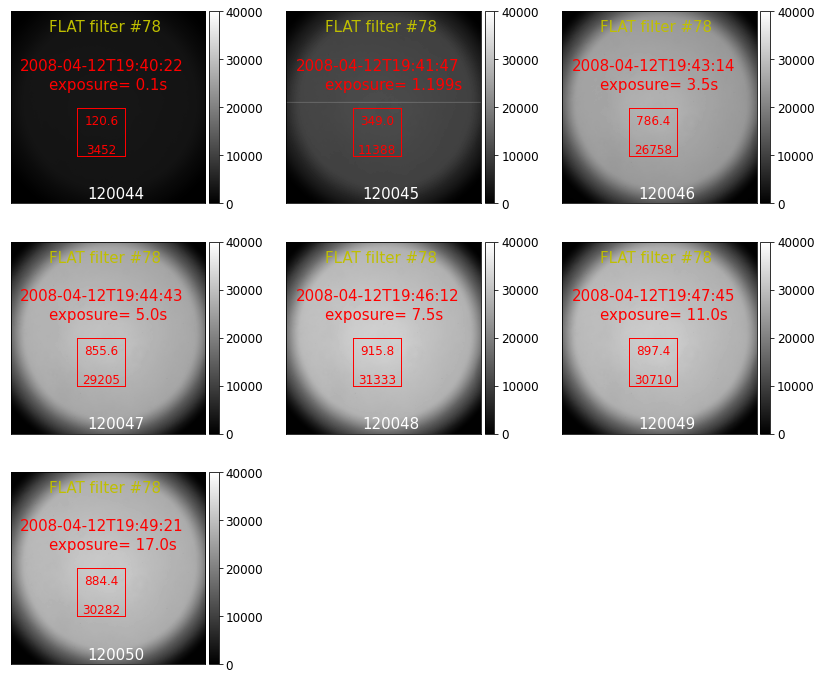

In [17]:
vmin,vmax = 0,40000
i = 0
fig = plt.figure(figsize=(14, 12))
for i in range(len(FF_list_78)):
        ax = plt.subplot(3,3,i+1)
        img = ax.imshow(image_flats_78[i],vmin=vmin,vmax=vmax)
        #ax.set_xlabel('X axis')
        #ax.set_ylabel('Y axis')
        ax.set_xticks([])
        ax.set_yticks([])
        draw_rectangle(ax, image_flats_78[i].data, 700, 1200, 500, 1000, color='r',text=True)
        #draw_rectangle(ax, image_flats_78[i].data, 1000, 1500, 1000, 1500, color='y',text=True)
        ax.text(800, 50, image_flats_78[i].header['FILENAME'][7:-5], fontsize=15, color='w')
        ax.text(400,1800,'FLAT filter #78', fontsize=15, color='y')
        ax.text(100, 1400, image_flats_78[i].header['DATE-OBS'], fontsize=15, color='r')
        ax.text(400, 1200, 'exposure= '+ str(image_flats_78[i].header['exptime']) +'s', fontsize=15, color='r')

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img, cax=cax) #, label='Number of counts')
        ax.grid()
        i = i + 1

The first two files has lower counts and we can choose to remove them from the combination to create the master FLAT.

In [18]:
#FF_list_78 = ['120044' , '120045' , '120046' , '120047', '120048' , '120049' , '120050']
FF_list_78 = ['120046' , '120047', '120048' , '120049' , '120050']

### Combining the FLATS images

The FLAT correction should be made using a combined FLAT image (master FLAT) using multiple observations. The combination will get rid of the high values produced by the cosmic rays and also of posible images of stars. We will use the ccdproc package.

In [19]:
# Some astropy packages 
import ccdproc
from ccdproc import CCDData, Combiner
from astropy import stats
from astropy.stats import sigma_clip, mad_std
from astropy.stats import sigma_clipped_stats

In [20]:
# Combiner is a class for combining CCDData objects.
# https://ccdproc.readthedocs.io/en/latest/api/ccdproc.Combiner.html
# The Combiner class is used to combine together CCDData objects 
# including the method for combining the data, rejecting outlying data, 
# and weighting used for combining frames.

combiner_49 = Combiner(image_flats_49)
combiner_76 = Combiner(image_flats_76)
combiner_78 = Combiner(image_flats_78)

In [21]:
# clipping all values over 800 to remove cosmic rays hits 
#combiner_76.minmax_clipping(min_clip=None, max_clip=38000)
# median combine 
master_flat_76 = combiner_76.median_combine()
master_flat_78 = combiner_78.median_combine()
master_flat_49 = combiner_49.median_combine()
# median filter  
# master_flat_49_filtered = ccdproc.median_filter(master_flat_49, 3)
# master_flat_76_filtered = ccdproc.median_filter(master_flat_76, 3)

Let display a region of one of the FLAT images and the master FLAT

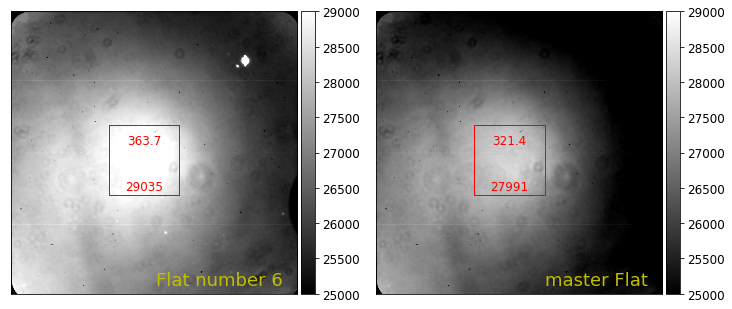

In [22]:
from matplotlib.colors import LogNorm
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
for i in range(2):
    ax = axarr[i]
    if i == 0:
        box = image_flats_76[5].data
        label = 'Flat number 6'
    if i == 1:  
        box = master_flat_76.data # We need to convert CCDdata to np.array
        label = 'master Flat'
    img = ax.imshow(box, vmin=25000, vmax=29000) #,norm=LogNorm())
    ax.text(0.95, 0.05,label, ha='right', va='center', color='y',
            transform=ax.transAxes, fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    draw_rectangle(ax, box, 700, 1200, 700, 1200, color='r',text=True)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img, cax=cax)
    

### Normalizing the FLATS

Since we will divide all the files by their corresponding FLAT, it is convinient to normalize the master FLAT. The mean value of the normalized FLAT is around 1 and the division will not alter the level of the images. We do not need to worry about since the flat is scaled by the mean of master_flat by the ccdproc.flat_correct procedure.

Let us chack that this is the true using one science image taken with  filter #76

In [23]:
image = CCDData.read(filelist[61])
print(image.header['object'],'  filter: ',image.header['ALFLTID'])

Sky Flat evening   filter:  76


In [24]:
reduced_image = ccdproc.flat_correct(image, master_flat_76)

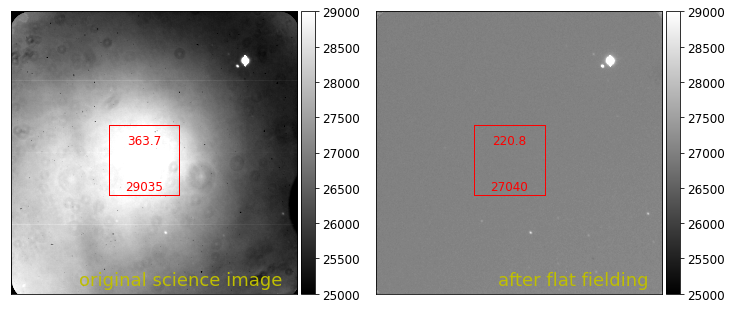

In [25]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
for i in range(2):
    ax = axarr[i]
    if i == 0:
        box = image.data
        label = 'original science image'
    if i == 1:  
        box = reduced_image.data # We need to convert CCDdata to np.array
        label = 'after flat fielding'
    img = ax.imshow(box,  vmin=25000, vmax=29000) #,norm=LogNorm())
    ax.text(0.95, 0.05,label, ha='right', va='center', color='y',
            transform=ax.transAxes, fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    draw_rectangle(ax, box, 700, 1200, 700, 1200, color='r',text=True)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img, cax=cax)
    

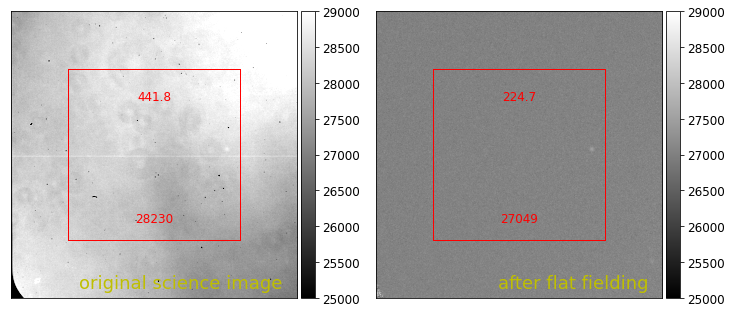

In [26]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
for i in range(2):
    ax = axarr[i]
    if i == 0:
        box = image.data[0:1000,0:1000]
        label = 'original science image'
    if i == 1:  
        box = reduced_image.data[0:1000,0:1000] # We need to convert CCDdata to np.array
        label = 'after flat fielding'
    img = ax.imshow(box, vmin=25000, vmax=29000) #,norm=LogNorm())
    ax.text(0.95, 0.05,label, ha='right', va='center', color='y',
            transform=ax.transAxes, fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    draw_rectangle(ax, box, 200, 800, 200, 800, color='r',text=True)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img, cax=cax)
    

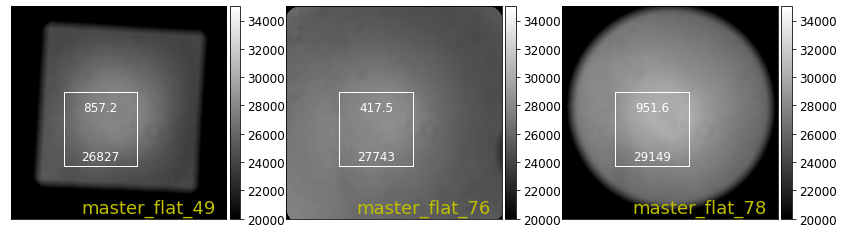

In [27]:
fig, axarr = plt.subplots(ncols=3, nrows=1, figsize=(14, 6))
for i in range(3):
    ax = axarr[i]
    if i == 0:
        box = master_flat_49
        label = 'master_flat_49'
    if i == 1:  
        box = master_flat_76 
        label = 'master_flat_76'
    if i == 2:  
        box = master_flat_78 
        label = 'master_flat_78'                
    img = ax.imshow(box, vmin=20000, vmax=35000) #,norm=LogNorm())
    ax.text(0.95, 0.05,label, ha='right', va='center', color='y',
            transform=ax.transAxes, fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    draw_rectangle(ax, box.data, 500, 1200, 500, 1200, color='w',text=True)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img, cax=cax)
    

#### Writting the Master FLATs

In [28]:
# Copy primary header from single dark file and copy into master_dark header
master_flat_49.header = image_flats_49[0].header.copy()
master_flat_76.header = image_flats_76[0].header.copy()
master_flat_78.header = image_flats_78[0].header.copy()

In [29]:
# Replace FILENAME keyword and add information
master_flat_49.header['HISTORY']  = 'super FLAT combining '+ str(len(image_flats_49)) + ' FLATS images'
master_flat_49.header['HISTORY']  =  str(datetime.datetime.now())[0:18]+' astropy median combine'
master_flat_49.header['HISTORY']  = 'FLATS images from ' + str(image_flats_49[0].header['FILENAME'])+' to ' + str(image_flats_49[-1].header['FILENAME'])
master_flat_49.header['FILENAME'] = 'N1_master_flat_49' 
master_flat_76.header['HISTORY']  = 'super FLAT combining '+ str(len(image_flats_76)) + ' FLATS images'
master_flat_76.header['HISTORY']  =  str(datetime.datetime.now())[0:18]+' astropy median combine'
master_flat_76.header['HISTORY']  = 'FLATS images from ' + str(image_flats_76[0].header['FILENAME'])+' to ' + str(image_flats_76[-1].header['FILENAME'])
master_flat_76.header['FILENAME'] = 'N1_master_flat_76' 
master_flat_78.header['HISTORY']  = 'super FLAT combining '+ str(len(image_flats_78)) + ' FLATS images'
master_flat_78.header['HISTORY']  =  str(datetime.datetime.now())[0:18]+' astropy median combine'
master_flat_78.header['HISTORY']  = 'FLATS images from ' + str(image_flats_78[0].header['FILENAME'])+' to ' + str(image_flats_78[-1].header['FILENAME'])
master_flat_78.header['FILENAME'] = 'N1_master_flat_78' 

In [30]:
master_flat_49.write(directory / 'flat_N1_49.fits',overwrite='yes')
master_flat_76.write(directory / 'flat_N1_76.fits',overwrite='yes')
master_flat_78.write(directory / 'flat_N1_78.fits',overwrite='yes')